In [36]:
%gui qt

In [ ]:
import tensorflow as tf
import numpy as np
import os
import h5py

import sys

import pandas as pd
import scipy
from scipy import ndimage

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import feature

import pickle
from pyface.timer.api import Timer

In [42]:
import mayavi
from mayavi import mlab
mlab.init_notebook(width=500,height=500)

Notebook initialized with ipy backend.


In [43]:
##TOPOLOGY
import ripser as rips
from ripser import ripser
from persim import plot_diagrams

In [44]:
n_samples=1248
n_testing=124



In [45]:
train=h5py.File("data/diBlockTrain.hdf5")['blocks']

In [7]:
#test=h5py.File("diBlockTest.hdf5")

In [8]:
np.sum(train[0][0])/64**3

0.5000000031523939

In [9]:
blockID=0
time=7

train[blockID][time].shape

(64, 64, 64)

In [10]:
times=train[0]
dat=train[0][7]

In [11]:


#pickle.dump(train[:4],open("AIhackMD/dataExample.p","wb"))

In [7]:
dat[0,0,0]

NameError: name 'dat' is not defined

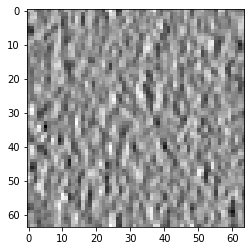

In [13]:
plt.gray()
plt.imshow(ndimage.sobel(times[0][32]))

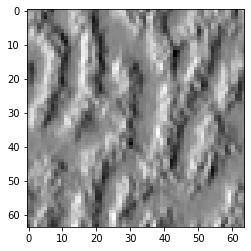

In [14]:
plt.gray()
plt.imshow(ndimage.sobel(times[7][32],mode="wrap"))

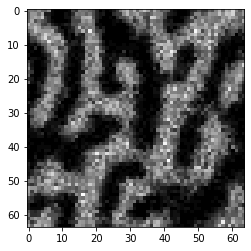

In [70]:
gFilt=ndimage.gaussian_filter(times[7][32],sigma=.25,mode="wrap")
plt.imshow(gFilt)

In [59]:
mlab.clf()
mlab.imshow(ndimage.sobel(times[7][32]))

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [55]:
@mlab.show
@mlab.animate(delay=250)
def animBlock(block,t=10):
    mlab.clf()
    for i in range(t):
        mlab.contour3d(block[i],transparent=True)
        yield
        

In [76]:
mlab.clf()
fig=mlab.figure()
#fig.scene.movie_maker.record=True
animBlock(times)
#Timer(250,next(animator)).start()
#mlab.show()
#mlab.close(fig)

In [54]:
next(animator)
mlab.show()

In [80]:
mlab.clf()
fig=mlab.figure()
#mlab.axes(x_axis_visibility=True,y_axis_visibility=True,z_axis_visibility=True)
mlab.points3d(times[7],transparent=True)
mlab.axes()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [81]:
mlab.clf()
fig=mlab.figure()
#mlab.axes(x_axis_visibility=True,y_axis_visibility=True,z_axis_visibility=True)
mlab.contour3d(times[7],transparent=True)
mlab.axes()


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [75]:
mlab.close(fig)

In [78]:
rip=rips.Rips()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [20]:
vars(rip)

{'maxdim': 1,
 'thresh': inf,
 'coeff': 2,
 'do_cocycles': False,
 'n_perm': None,
 'verbose': True,
 'dgms_': None,
 'cocycles_': None,
 'dperm2all_': None,
 'metric_': None,
 'num_edges_': None,
 'idx_perm_': None,
 'r_cover_': 0.0}

In [12]:
type(dat[0,0,0])

numpy.float64

In [16]:
#riprun=ripser(dat,distance_matrix=False)

c:\code\git\ripser.py\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

In [69]:
count=5
eps=.1

time1=3
time2=8

poly1=10
poly2=100

bSize=4

In [70]:
#Aaron's boxes: remember that boxes1[j] gives you the jth 5x5x5 block of block 11, time 3 that contains greater than count from the training data

boxes1=[train[poly1][time1][x-bSize:x+bSize+1][y-bSize:y+bSize+1][z-bSize:z+bSize+1] for x,y,z in zip(range(0,64,bSize//2),range(0,64,bSize//2),range(0,64,bSize//2)) if sum([1 for i in train[poly1][t][x-bSize:x+bSize+1][y-bSize:y+bSize+1][z-bSize:z+bSize+1].flatten() if i>.5-eps and i < .5+eps]) >= count] 


#lower eps and raise count if data is too large to go through, or vice versa to increase



In [71]:
##split up cells to make it easy to rerun one at a time
boxes2=[train[poly1][time2][x-bSize:x+bSize+1][y-bSize:y+bSize+1][z-bSize:z+bSize+1] for x,y,z in zip(range(0,64,bSize//2),range(0,64,bSize//2),range(0,64,bSize//2)) if sum([1 for i in train[poly1][t][x-bSize:x+bSize+1][y-bSize:y+bSize+1][z-bSize:z+bSize+1].flatten() if i>.5-eps and i < .5+eps]) >= count] 


In [72]:
#Juhae's boxes

boxes3=[train[poly2][time1][x-bSize:x+bSize+1][y-bSize:y+bSize+1][z-bSize:z+bSize+1] for x,y,z in zip(range(0,64,bSize//2),range(0,64,bSize//2),range(0,64,bSize//2)) if sum([1 for i in train[poly1][t][x-bSize:x+bSize+1][y-bSize:y+bSize+1][z-bSize:z+bSize+1].flatten() if i>.5-eps and i < .5+eps]) >= count] 

In [ ]:
boxes4=[train[poly2][time2][x-bSize:x+bSize+1][y-bSize:y+bSize+1][z-bSize:z+bSize+1] for x,y,z in zip(range(0,64,bSize//2),range(0,64,bSize//2),range(0,64,bSize//2)) if sum([1 for i in train[poly1][t][x-bSize:x+bSize+1][y-bSize:y+bSize+1][z-bSize:z+bSize+1].flatten() if i>.5-eps and i < .5+eps]) >= count] 

[array([[[0.448, 0.832, 0.896, ..., 0.   , 0.   , 0.064],
         [0.256, 0.576, 0.832, ..., 0.064, 0.256, 0.256],
         [0.512, 1.024, 0.896, ..., 0.   , 0.128, 0.512],
         ...,
         [0.704, 0.896, 0.832, ..., 0.256, 0.384, 0.768],
         [0.512, 0.896, 0.704, ..., 0.   , 0.064, 0.192],
         [0.32 , 0.96 , 0.256, ..., 0.   , 0.064, 0.32 ]],
 
        [[0.448, 1.216, 0.832, ..., 0.   , 0.064, 0.   ],
         [0.448, 0.448, 0.896, ..., 0.   , 0.192, 0.32 ],
         [0.64 , 0.384, 0.768, ..., 0.192, 0.   , 0.64 ],
         ...,
         [1.216, 1.216, 0.768, ..., 0.192, 0.32 , 0.32 ],
         [0.704, 0.768, 0.576, ..., 0.   , 0.   , 0.256],
         [0.384, 0.96 , 1.216, ..., 0.   , 0.128, 0.192]],
 
        [[0.704, 0.768, 1.088, ..., 0.   , 0.128, 0.384],
         [0.704, 1.024, 1.152, ..., 0.064, 0.064, 0.192],
         [0.768, 0.896, 1.152, ..., 0.064, 0.128, 0.064],
         ...,
         [1.152, 0.704, 0.96 , ..., 0.128, 0.   , 0.64 ],
         [0.832, 0.896, 

In [61]:
mlab.clf()
fig=mlab.figure()
#mlab.axes(x_axis_visibility=True,y_axis_visibility=True,z_axis_visibility=True)
mlab.points3d(boxes1[0],transparent=True)
mlab.axes()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [ ]:
boxes=[boxes1,boxes2,boxes3,boxes4]

for b in range(len(boxes)):
    
    pickle.dump(boxes[b],open(f"AIhackMD/lilBox{b+1}_5Count1eps","wb"))